<a href="https://colab.research.google.com/github/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/blob/time-series/AircraftMilesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/main/CSV%20Files/us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Month    96 non-null     datetime64[ns]
 1   MilesMM  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


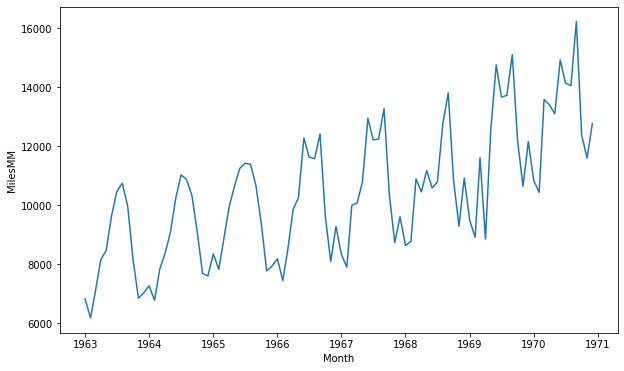

In [32]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['Month'], y=df['MilesMM'])

In [33]:
# Getting the miles mean for every quarter (downsampling)

quarterly_miles_df = df.resample('Q', on='Month').mean()
quarterly_miles_df.head()

,MilesMM
Month,
1963-03-31,6696.333333
1963-06-30,8756.000000
1963-09-30,10392.333333
1963-12-31,7356.333333
1964-03-31,7287.666667


In [34]:
# Getting the total miles for each year (downsampling)

yearly_total_miles_df = df.resample('A', on='Month').sum()
yearly_total_miles_df.head()

,MilesMM
Month,
1963-12-31,99603
1964-12-31,106192
1965-12-31,115431
1966-12-31,119154
1967-12-31,126515


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


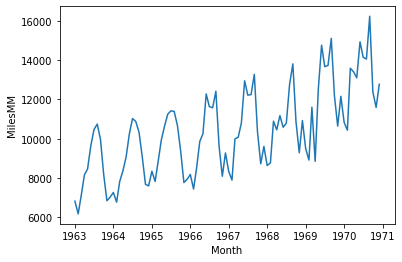

In [35]:
sns.lineplot(df['Month'], df['MilesMM'])

In [36]:
df['Year'] = df['Month'].dt.year
df.head()

df.drop(columns=['Year'], inplace=True)

In [37]:
# Upsampling

unsampled_miles_df = df.resample('D', on='Month').mean()
unsampled_miles_df.head(35)

,MilesMM
Month,
1963-01-01,6827.0
1963-01-02,NaN
1963-01-03,NaN
1963-01-04,NaN
1963-01-05,NaN
1963-01-06,NaN
1963-01-07,NaN
1963-01-08,NaN
1963-01-09,NaN


In [38]:
# Filling in missing values using linear regression

interpolated_miles_df = unsampled_miles_df.interpolate(method='linear')
interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6806.064516
1963-01-03,6785.129032
1963-01-04,6764.193548
1963-01-05,6743.258065
1963-01-06,6722.322581
1963-01-07,6701.387097
1963-01-08,6680.451613
1963-01-09,6659.516129


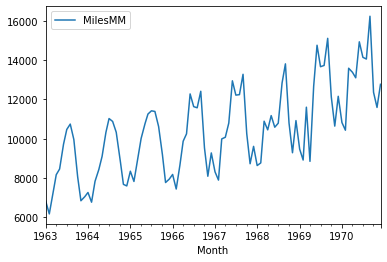

In [39]:
interpolated_miles_df.plot()

In [40]:
# Remove edges

poly_interpolated_miles_df = unsampled_miles_df.interpolate(method='spline', order=2)
poly_interpolated_miles_df.head(32)

,MilesMM
Month,
1963-01-01,6827.000000
1963-01-02,6775.328886
1963-01-03,6725.739829
1963-01-04,6678.197709
1963-01-05,6632.702526
1963-01-06,6589.254280
1963-01-07,6547.852971
1963-01-08,6508.498600
1963-01-09,6471.191166


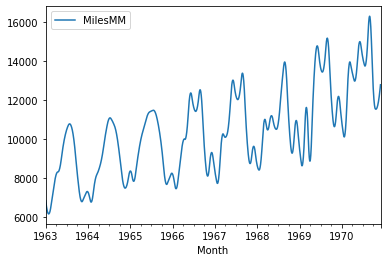

In [41]:
poly_interpolated_miles_df.plot()

In [45]:
new_df = pd.DataFrame(poly_interpolated_miles_df)
new_df.to_csv('aircraftdata.csv')